<a href="https://colab.research.google.com/github/asafuM-56/Data-Science-Worksheets/blob/main/Worksheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary packages

In [19]:
!pip install shap -q


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.8 MB/s eta 0:00:00


Importing the dataset

In [57]:
#Loading the Dataset
import pandas as pd

# Loading the Dataset using the file path method
file_path = '/content/Hydrogen storage dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())  # Print the first few rows of the DataFrame
print(df.describe())

                                       Material name  \
0  Carbon nanotube functionalized with HNO3 at 80 °C   
1  Carbon nanotube functionalized with HNO3 at 80 °C   
2  Carbon nanotube functionalized with HNO3 at 80 °C   
3  Carbon nanotube functionalized with HNO3 at 80 °C   
4  Carbon nanotube functionalized with HNO3 at 80 °C   

   Average crystal size (nm)  Crystalinity index (%)  \
0                   3.780644               82.394903   
1                   3.780644               82.394903   
2                   3.780644               82.394903   
3                   3.780644               82.394903   
4                   3.780644               82.394903   

    BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                     125.2                1.018            298.0   
1                     125.2                1.018            298.0   
2                     125.2                1.018            298.0   
3                     125.2                1.018  

Printing Data Types

In [58]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

Material name                        object
Average crystal size (nm)           float64
Crystalinity index (%)              float64
 BET surface area (m²/g)            float64
Pore volume (cm³/g)                 float64
Temperature (K)                     float64
Pressure (bar)                       object
Hydrogen uptake/adsorption (wt%)    float64
Hydrogen desorption (wt%)           float64
dtype: object


Changing Pressure from object to float

In [59]:
df['Pressure (bar)'] = df['Pressure (bar)'].astype(float)

# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

Material name                        object
Average crystal size (nm)           float64
Crystalinity index (%)              float64
 BET surface area (m²/g)            float64
Pore volume (cm³/g)                 float64
Temperature (K)                     float64
Pressure (bar)                      float64
Hydrogen uptake/adsorption (wt%)    float64
Hydrogen desorption (wt%)           float64
dtype: object


sort into numerical and categorical columns

In [60]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)


Numeric columns: Index(['Average crystal size (nm)', 'Crystalinity index (%)',
       ' BET surface area (m²/g)', 'Pore volume (cm³/g)', 'Temperature (K)',
       'Pressure (bar)', 'Hydrogen uptake/adsorption (wt%)',
       'Hydrogen desorption (wt%)'],
      dtype='object')

Categorical columns: Index(['Material name'], dtype='object')


Check for missing values

In [62]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Material name                         0
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)    116
Hydrogen desorption (wt%)           388
dtype: int64


Will fill the missing data with zeros

In [63]:
df['Hydrogen uptake/adsorption (wt%)'] = df['Hydrogen uptake/adsorption (wt%)'].fillna(0)
df['Hydrogen desorption (wt%)'] = df['Hydrogen desorption (wt%)'].fillna(0)

# Verify that missing values have been removed
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after_cleaning)


Missing values after cleaning:
 Material name                       0
Average crystal size (nm)           0
Crystalinity index (%)              0
 BET surface area (m²/g)            0
Pore volume (cm³/g)                 0
Temperature (K)                     0
Pressure (bar)                      0
Hydrogen uptake/adsorption (wt%)    0
Hydrogen desorption (wt%)           0
dtype: int64


In [64]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Print the encoded DataFrame
print(df_encoded.head())

   Average crystal size (nm)  Crystalinity index (%)  \
0                   3.780644               82.394903   
1                   3.780644               82.394903   
2                   3.780644               82.394903   
3                   3.780644               82.394903   
4                   3.780644               82.394903   

    BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                     125.2                1.018            298.0   
1                     125.2                1.018            298.0   
2                     125.2                1.018            298.0   
3                     125.2                1.018            298.0   
4                     125.2                1.018            298.0   

   Pressure (bar)  Hydrogen uptake/adsorption (wt%)  \
0         0.00000                          0.000000   
1         4.89664                          0.013857   
2        10.06960                          0.018396   
3        20.01670           

Looking for outliers

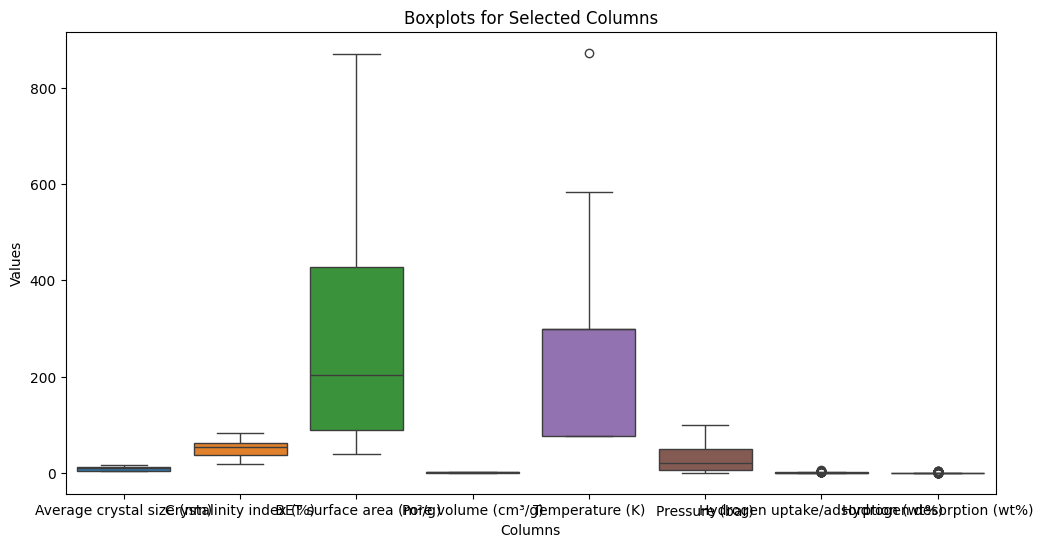

Outliers detected in the following columns:
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       1
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)     42
Hydrogen desorption (wt%)           121
dtype: int64


In [65]:
#Looking for outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the interquartile range (IQR) for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (df[numeric_cols] < (Q1 - outlier_threshold)) | (df[numeric_cols] > (Q3 + outlier_threshold))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numeric_cols], ax=ax)

# Set labels and title
ax.set_title('Boxplots for Selected Columns')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

plt.show()

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

Dropping the outliers

In [66]:
# Calculate the interquartile range (IQR) for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 2 * IQR

# Identify outliers
outliers = (df[numeric_cols] < (Q1 - outlier_threshold)) | (df[numeric_cols] > (Q3 + outlier_threshold))

# Drop rows containing outliers
df = df[~outliers.any(axis=1)]

#Re-identifying the outliers for display purposes
outliers = (df[numeric_cols] < (Q1 - outlier_threshold)) | (df[numeric_cols] > (Q3 + outlier_threshold))

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

No outliers detected.


Check the dataset for duplicates

In [67]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()
# If there are any duplicates, the 'duplicates' variable will contain True for those rows
if duplicates.any():
    # Get the rows with duplicates
    duplicate_rows = df[duplicates]
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


Looking at Correlations. For the remainder of the machine learning development, Hydrogen uptake will be '1' and hydrogen desorption will be '2'

In [68]:
#Redefining numeric columns since I get an error if I don't
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix
correlations_1 = numeric_cols.corr()['Hydrogen uptake/adsorption (wt%)']
correlations_2 = numeric_cols.corr()['Hydrogen desorption (wt%)']
print(correlations_1)
print(correlations_2)

Average crystal size (nm)           0.148362
Crystalinity index (%)             -0.269231
 BET surface area (m²/g)            0.363868
Pore volume (cm³/g)                -0.213268
Temperature (K)                     0.055753
Pressure (bar)                      0.362523
Hydrogen uptake/adsorption (wt%)    1.000000
Hydrogen desorption (wt%)          -0.270885
Name: Hydrogen uptake/adsorption (wt%), dtype: float64
Average crystal size (nm)          -0.115451
Crystalinity index (%)              0.214369
 BET surface area (m²/g)           -0.078751
Pore volume (cm³/g)                -0.076495
Temperature (K)                    -0.064877
Pressure (bar)                     -0.102179
Hydrogen uptake/adsorption (wt%)   -0.270885
Hydrogen desorption (wt%)           1.000000
Name: Hydrogen desorption (wt%), dtype: float64


Comparing the Random Forest, Gradient Boosting, and XGBoost for the Hydrogen uptake

In [71]:
X = df.drop('Hydrogen uptake/adsorption (wt%)',axis=1)
Y = df['Hydrogen uptake/adsorption (wt%)']

# Select only numerical columns (excluding 'object' type)
X = X.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initializing the models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')

Random Forest Mean Squared Error: 0.007, R² Score: 0.959, MAE: 0.046
 
Gradient Boosting Mean Squared Error: 0.007, R² Score: 0.958, MAE: 0.058
 
XGBoost Mean Squared Error: 0.005, R² Score: 0.967, MAE: 0.044
 


Doing the same as above, but for the Hydrogen desorption

In [72]:
X = df.drop('Hydrogen desorption (wt%)',axis=1)
Y = df['Hydrogen desorption (wt%)']

# Select only numerical columns (excluding 'object' type)
X = X.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initializing the models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')

Random Forest Mean Squared Error: 0.000, R² Score: 0.661, MAE: 0.006
 
Gradient Boosting Mean Squared Error: 0.000, R² Score: 0.707, MAE: 0.005
 
XGBoost Mean Squared Error: 0.000, R² Score: 0.716, MAE: 0.005
 


Based on the Mean Squared Error, R2, and MAE, the XGBoost model is the best fitting model for the data.

Defining Helper Equations for SHAP

In [77]:
def plot_feature_importance(data, target_column, model):
    encoded_df = pd.get_dummies(data, columns=['Material name'])
    x = encoded_df.drop(target_column, axis=1)
    y = encoded_df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Feature Importance plot
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()

    fig = go.Figure(go.Bar(
        x=feature_importance[sorted_idx],
        y=x.columns[sorted_idx],
        orientation='h'
    ))
    fig.update_layout(title="Extra Trees Regressor - Feature Importance")
    fig.update_layout(height=600, width=1000, title_text="Feature Importance and SHAP Summary")
    fig.show()

Using SHAP to find feature importance for Hydrogen uptake

In [78]:
# define model to use
model = XGBRegressor()
plot_feature_importance(df,'Hydrogen uptake/adsorption (wt%)',model)

The three most important features for Hydrogen uptake are:
Temperature, BET Surface Area, and SWCT doped with Mg Ni Cu

Using SHAP to find feature importance for Hydrogen desorption

In [79]:
# define model to use
model = XGBRegressor()
plot_feature_importance(df,'Hydrogen desorption (wt%)',model)

The three most important features for Hydrogen uptake are:
Crystalinity index, Carbon nanotube functionalized with H2SO4:HNO3 at 100 C, and Average crystal Size

According to the model, Crystalinity index is the most important feature when trying to optimize for hydrogen desorption, and Temperature is the most important feature when optimizing for Hydrogen Uptake.